# Coursework Assignment

## Data Loading and Cleaning

### Loading Data

In [94]:
#Importing Relevant Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, confusion_matrix, plot_confusion_matrix, classification_report, recall_score, precision_recall_curve
from scipy import stats
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [95]:
# link to data set: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

hotel = pd.read_csv("hotel_bookings.csv")
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Missing Values

In [96]:
#Exploring for missing values
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [97]:
#Exploring company column
hotel['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
174.0    149
219.0    141
281.0    138
154.0    133
405.0    119
233.0    114
51.0      99
94.0      87
47.0      72
135.0     66
169.0     65
242.0     62
331.0     61
348.0     59
498.0     58
110.0     52
38.0      51
20.0      50
280.0     48
342.0     48
91.0      48
62.0      47
197.0     47
68.0      46
218.0     43
270.0     43
195.0     38
202.0     38
148.0     37
9.0       37
113.0     36
307.0     36
204.0     34
269.0     33
308.0     33
238.0     33
86.0      32
72.0      30
385.0     30
43.0      29
343.0     29
365.0     29
144.0     27
221.0     27
178.0     27
46.0      26
337.0     25
418.0     25
366.0     24
424.0     24
179.0     24
227.0     24
507.0     23
81.0      23
477.0     23
78.0      22
88.0      22
407.0     22
286.0     21
216.0     21
523.0     19
209.0     19
150.0     19
122.0     18
292.0     18
396.0     18
251.0     18
163.0     17
143.0     17
290.0     17
31.0      17
103.0     16

In [98]:
#Exploring agent column
hotel['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
6.0       3290
250.0     2870
241.0     1721
28.0      1666
8.0       1514
3.0       1336
37.0      1230
19.0      1061
40.0      1039
314.0      927
21.0       875
229.0      786
242.0      780
83.0       696
29.0       683
171.0      607
12.0       578
85.0       554
20.0       540
96.0       537
243.0      514
30.0       484
134.0      482
298.0      472
27.0       450
15.0       402
26.0       401
11.0       395
22.0       382
56.0       375
273.0      349
177.0      347
86.0       338
58.0       335
5.0        330
119.0      304
196.0      301
34.0       294
44.0       292
138.0      287
315.0      284
38.0       274
10.0       260
236.0      247
16.0       246
17.0       241
115.0      225
251.0      220
68.0       211
42.0       211
191.0      198
175.0      195
195.0      193
154.0      193
156.0      190
168.0      184
152.0      183
208.0      173
143.0      172
326.0      165
2.0        162
31.0      

In [99]:
#Dropping Agent and Company columns
hotel = hotel.drop(['agent', 'company'], axis = 1)
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [100]:
#Dropping missing values of other columns
hotel.dropna(inplace = True)
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

### Outliers

In [166]:
#Looking and data for outliers
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000
mean,0.371350,104.311255,2016.157650,27.166818,15.800893,0.928879,2.502128,1.858389,0.104209,0.007948,0.032003,0.087143,0.131619,0.221160,2.330793,101.959594,0.061886,0.571693
std,0.483168,106.903696,0.707461,13.589932,8.780302,0.996181,1.900152,0.578580,0.399175,0.097381,0.176008,0.845876,1.484674,0.652766,17.630598,48.090374,0.244174,0.792681
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


<AxesSubplot:xlabel='adr', ylabel='Count'>

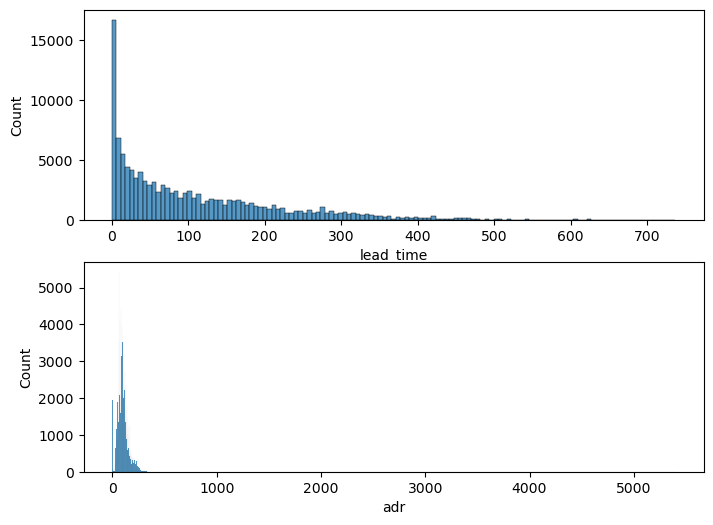

In [102]:
#Visualizing and searching for errors
fig, ax = plt.subplots(2,1, figsize =(8,6))
sns.histplot(hotel['lead_time'], ax= ax[0])
sns.histplot(hotel['adr'], ax = ax[1])

In [103]:
#Filtering for wrongly imputed data
hotel = hotel[(hotel['adr'] < 5300) & (hotel['adr'] >= 0)]
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000
mean,0.371350,104.311255,2016.157650,27.166818,15.800893,0.928879,2.502128,1.858389,0.104209,0.007948,0.032003,0.087143,0.131619,0.221160,2.330793,101.959594,0.061886,0.571693
std,0.483168,106.903696,0.707461,13.589932,8.780302,0.996181,1.900152,0.578580,0.399175,0.097381,0.176008,0.845876,1.484674,0.652766,17.630598,48.090374,0.244174,0.792681
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


<AxesSubplot:xlabel='adr', ylabel='Count'>

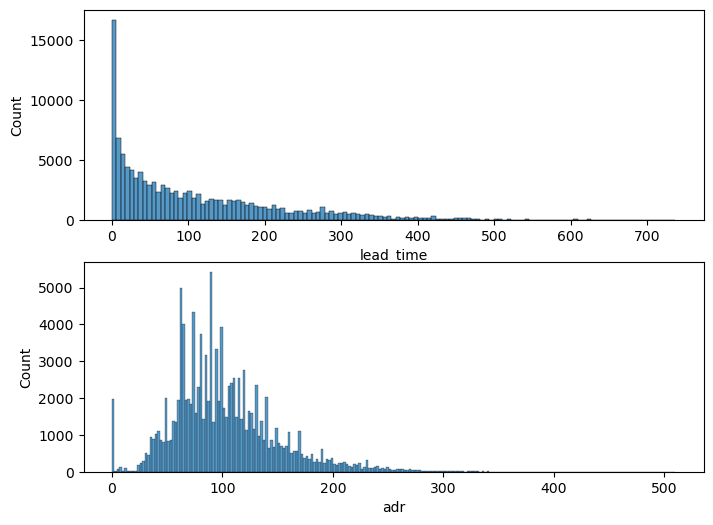

In [104]:
fig, ax = plt.subplots(2,1, figsize =(8,6))
sns.histplot(hotel['lead_time'], ax= ax[0])
sns.histplot(hotel['adr'], ax = ax[1])

In [105]:
#Exploring "free" reservations
hotel[hotel['adr'] == 0]['market_segment'].value_counts()

Complementary    671
Online TA        366
Offline TA/TO    330
Groups           251
Direct           238
Corporate         76
Aviation           6
Name: market_segment, dtype: int64

In [106]:
hotel.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,118896,118896,118896,118896,118896,118896,118896,118896,118896,118896,118896,118896
unique,2,12,5,177,7,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79301,13852,91861,48585,56402,97729,85599,73862,104162,89173,74744,1461


In [107]:
hotel['adults'].value_counts()

2     89493
1     22735
3      6197
0       393
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [108]:
#Setting variable to date and time
hotel['reservation_status_date'] = pd.to_datetime(hotel['reservation_status_date'])
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118896 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118896 non-null  object        
 1   is_canceled                     118896 non-null  int64         
 2   lead_time                       118896 non-null  int64         
 3   arrival_date_year               118896 non-null  int64         
 4   arrival_date_month              118896 non-null  object        
 5   arrival_date_week_number        118896 non-null  int64         
 6   arrival_date_day_of_month       118896 non-null  int64         
 7   stays_in_weekend_nights         118896 non-null  int64         
 8   stays_in_week_nights            118896 non-null  int64         
 9   adults                          118896 non-null  int64         
 10  children                        118896 non-null  float64

## Exploratory Data Analysis and Visualization

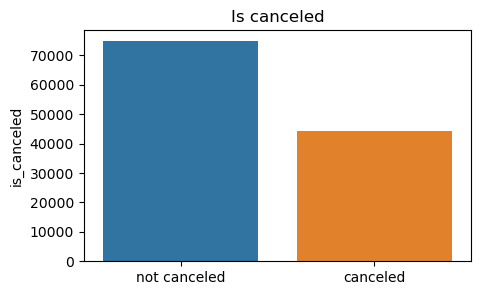

In [109]:
#Barchart of is canceled
fig, ax = plt.subplots(figsize = (5,3))
sns.barplot(x =['not canceled', 'canceled'], y =hotel['is_canceled'].value_counts())
plt.title('Is canceled')
plt.show()

In [110]:
hotel['is_canceled'].value_counts()

0    74744
1    44152
Name: is_canceled, dtype: int64

In [111]:
hotel['deposit_type'].value_counts()

No Deposit    104162
Non Refund     14572
Refundable       162
Name: deposit_type, dtype: int64

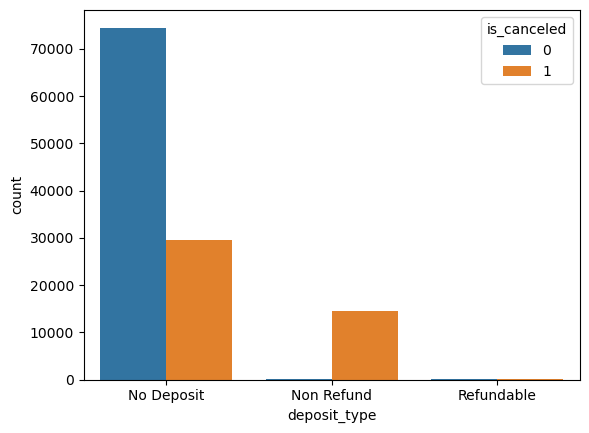

In [112]:
#bar chart of deposit type
deposit_type = hotel.groupby(['deposit_type', 'is_canceled']).size().reset_index(name = 'count')
sns.barplot(x = 'deposit_type', y = 'count', hue = 'is_canceled', data = deposit_type)
plt.show()

In [113]:
#Exploring non refund type
view = hotel[hotel['deposit_type'] == 'Non Refund']
view['reservation_status'].value_counts()

Canceled     14445
Check-Out       93
No-Show         34
Name: reservation_status, dtype: int64

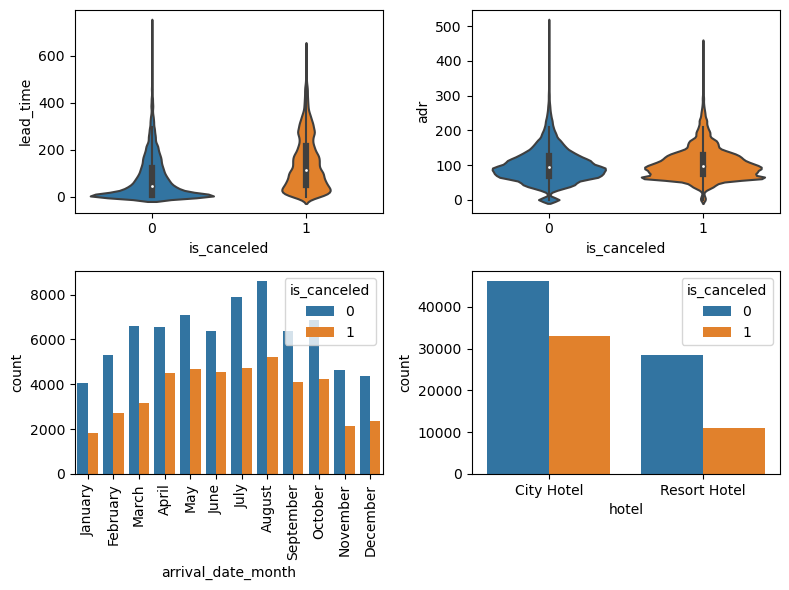

In [114]:
#Plotting relationship between important variables
fig, ax = plt.subplots(2,2, figsize= (8,6))
sns.violinplot(x = 'is_canceled', y = 'lead_time', data = hotel, ax = ax[0,0])
sns.violinplot(x = 'is_canceled', y='adr', data = hotel,  ax = ax[0,1])
months = hotel.groupby(['arrival_date_month', 'is_canceled']).size().reset_index(name='count')
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(x = 'arrival_date_month', y = 'count', hue = 'is_canceled', data = months, order = month_order, ax = ax[1,0])
ax[1,0].set_xticklabels(labels= month_order, rotation = 90)
hotel_type = hotel.groupby(['hotel', 'is_canceled']).size().reset_index(name = 'count')
sns.barplot(x = 'hotel', y = 'count', hue = 'is_canceled', data = hotel_type, ax = ax[1,1])
plt.tight_layout()
plt.show()

In [115]:
#Calculating percentage of cancelled by hotel
percentage_canceled = pd.pivot_table(hotel_type, values='count', index = 'hotel', columns ='is_canceled' )
percentage_canceled['canceled_percentage'] = percentage_canceled[1] / (percentage_canceled[0] + percentage_canceled[1]) * 100
percentage_canceled

is_canceled,0,1,canceled_percentage
hotel,,,
City Hotel,46226,33075,41.708175
Resort Hotel,28518,11077,27.975755


In [116]:
#Calculating percentage of cancelled by month
percentage_canceled = pd.pivot_table(months, values='count', index = 'arrival_date_month', columns ='is_canceled' )
percentage_canceled['canceled_percentage'] = percentage_canceled[1] / (percentage_canceled[0] + percentage_canceled[1]) * 100
percentage_canceled = percentage_canceled.sort_values('canceled_percentage', ascending= False)
percentage_canceled

is_canceled,0,1,canceled_percentage
arrival_date_month,,,
June,6393,4534,41.493548
April,6533,4512,40.851064
May,7102,4677,39.706257
September,6367,4100,39.170727
October,6867,4228,38.107256
August,8618,5234,37.785157
July,7892,4736,37.503959
December,4365,2363,35.121879
February,5317,2695,33.637044


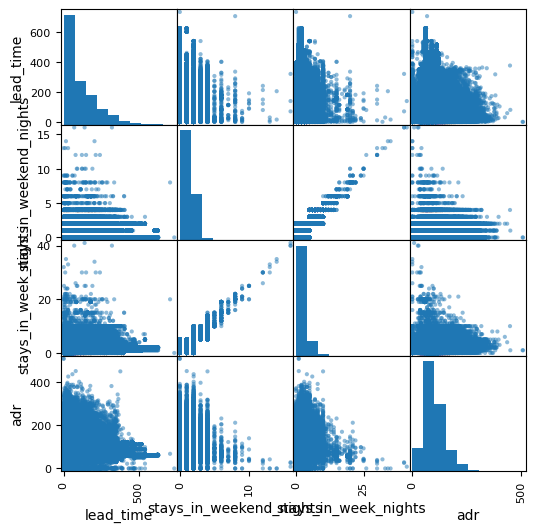

In [117]:
#Scatter plots of numerical relevant
numeric_vars = hotel[['lead_time', 'stays_in_weekend_nights','stays_in_week_nights', 'adr' ]]
pd.plotting.scatter_matrix(numeric_vars, figsize = (6,6))
plt.show()

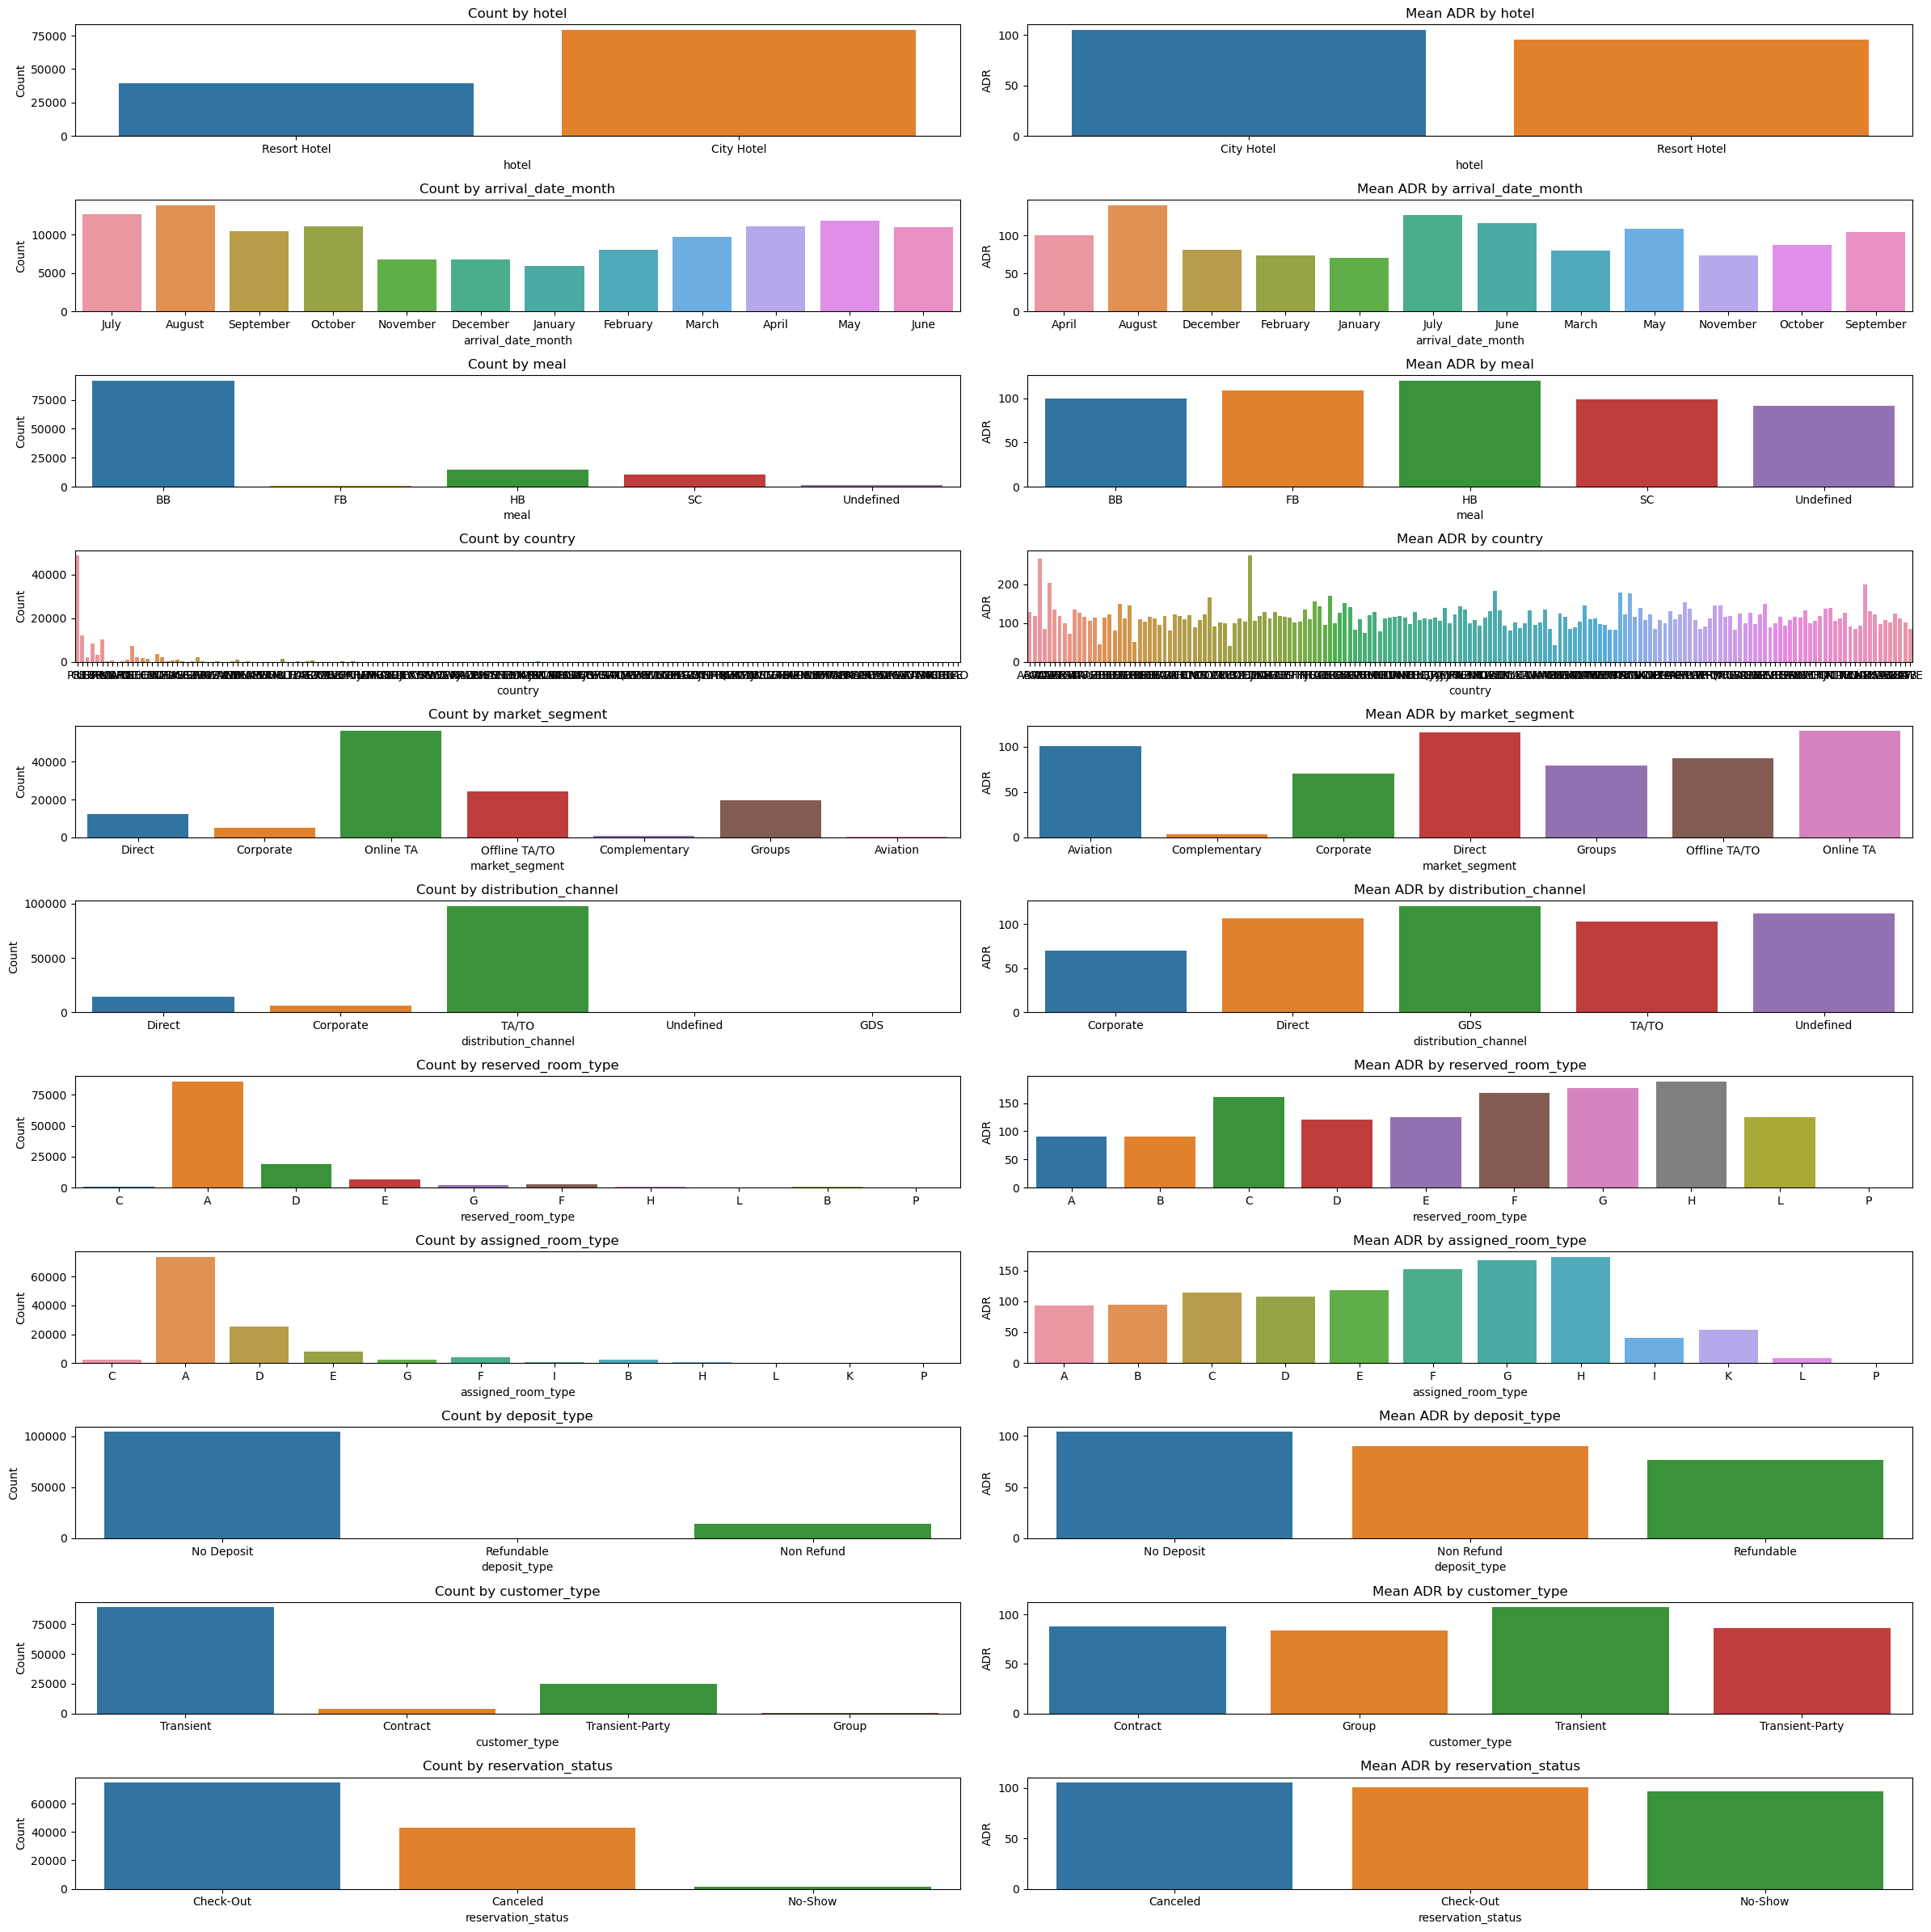

In [118]:
#Plot of count of bookings by category and mean adr by category
object_col = hotel.select_dtypes(include='object').columns

fig, axes = plt.subplots(nrows=len(object_col), ncols=2, figsize=(24, 24))

for i, var in enumerate(object_col):
    sns.countplot(x=var, data=hotel, ax=axes[i,0])
    axes[i,0].set_xlabel(var)
    axes[i,0].set_ylabel('Count')
    axes[i,0].set_title(f'Count by {var}')
    
    sns.barplot(x=var, y='adr', data=hotel.groupby(var)['adr'].mean().reset_index(), ax=axes[i,1])
    axes[i,1].set_xlabel(var)
    axes[i,1].set_ylabel('ADR')
    axes[i,1].set_title(f'Mean ADR by {var}')

plt.tight_layout()
plt.show()

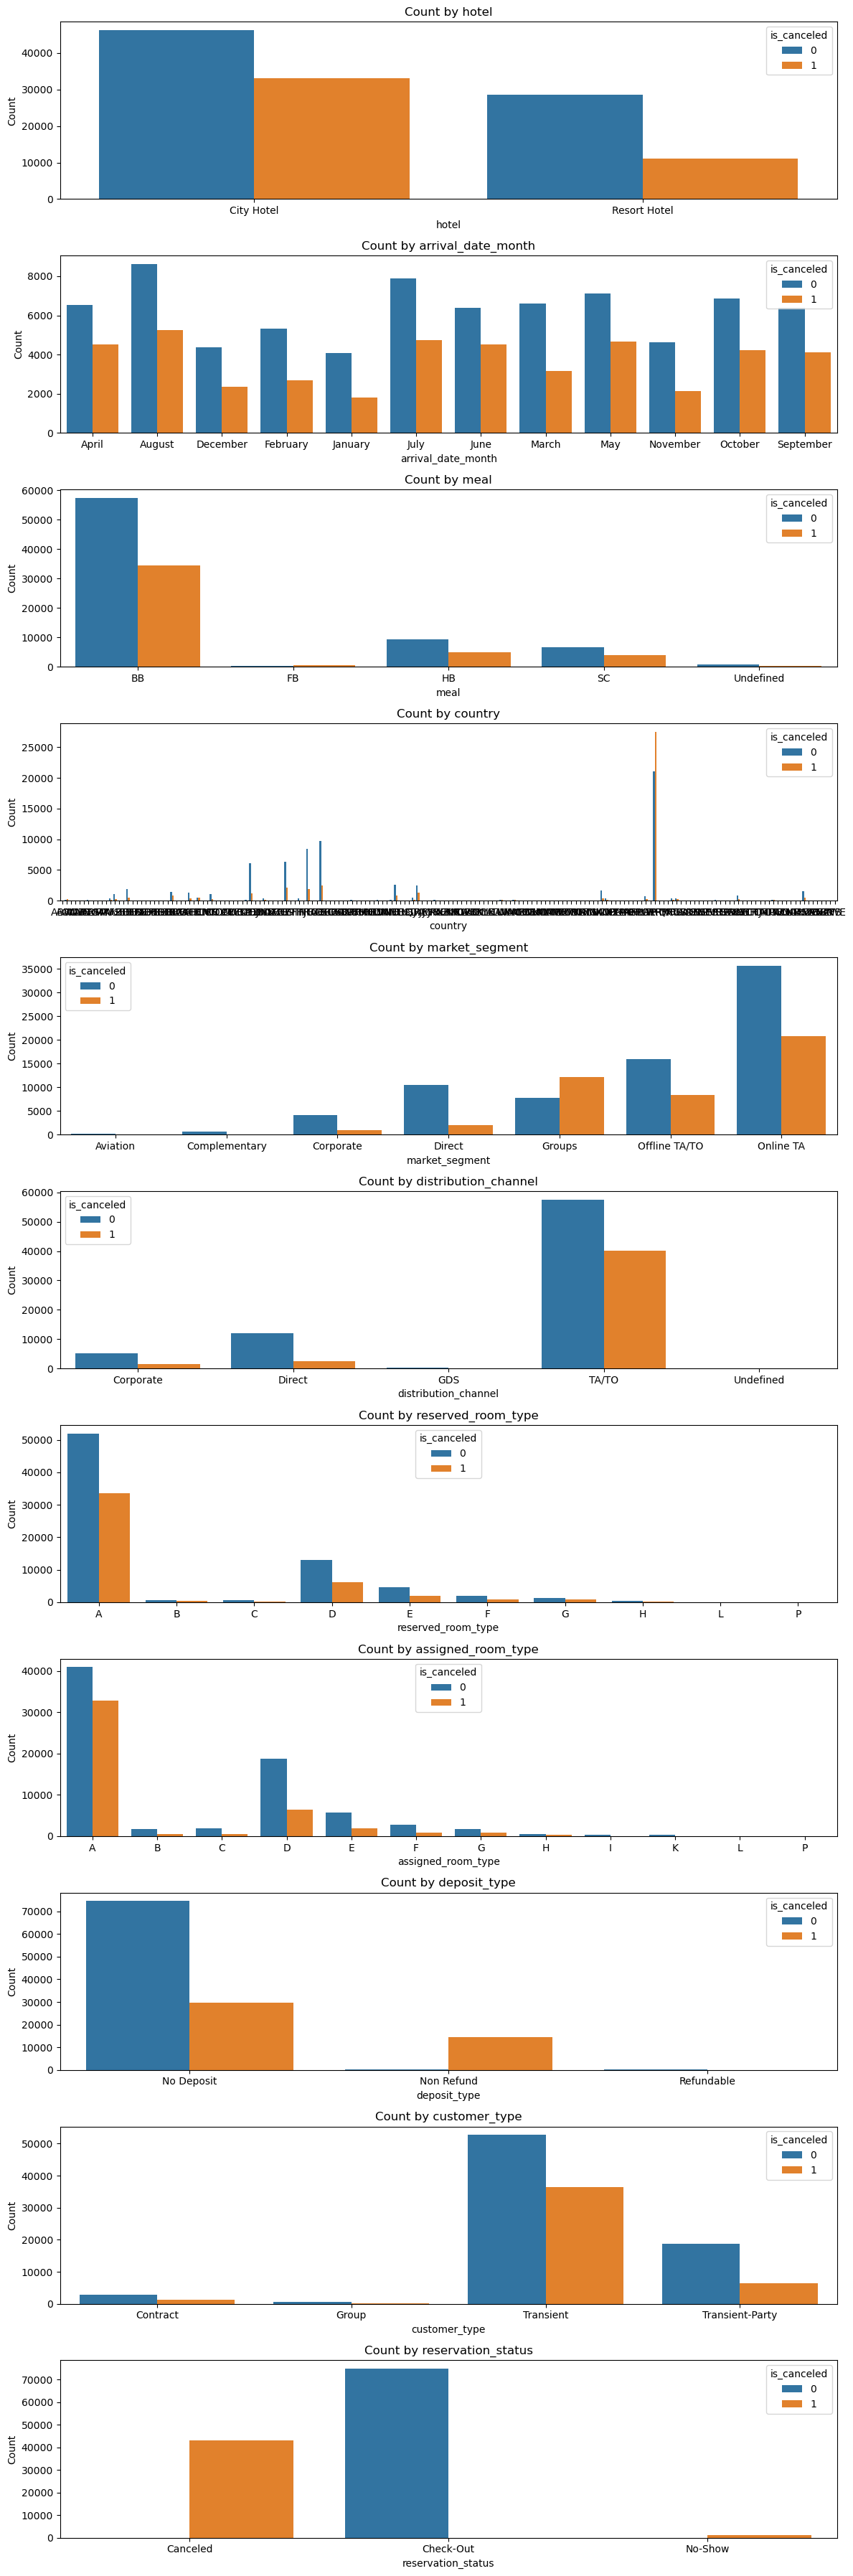

In [119]:
#Analysis of canceled comparing categories

fig, axes = plt.subplots(nrows=len(object_col), figsize=(12, 36))

for i,var in enumerate(object_col):
    sns.barplot(x=var, y = 'count', data=hotel.groupby([var, 'is_canceled']).size().reset_index(name = 'count'), hue = 'is_canceled', ax=axes[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Count by {var}')
    
    
plt.tight_layout()
plt.show()

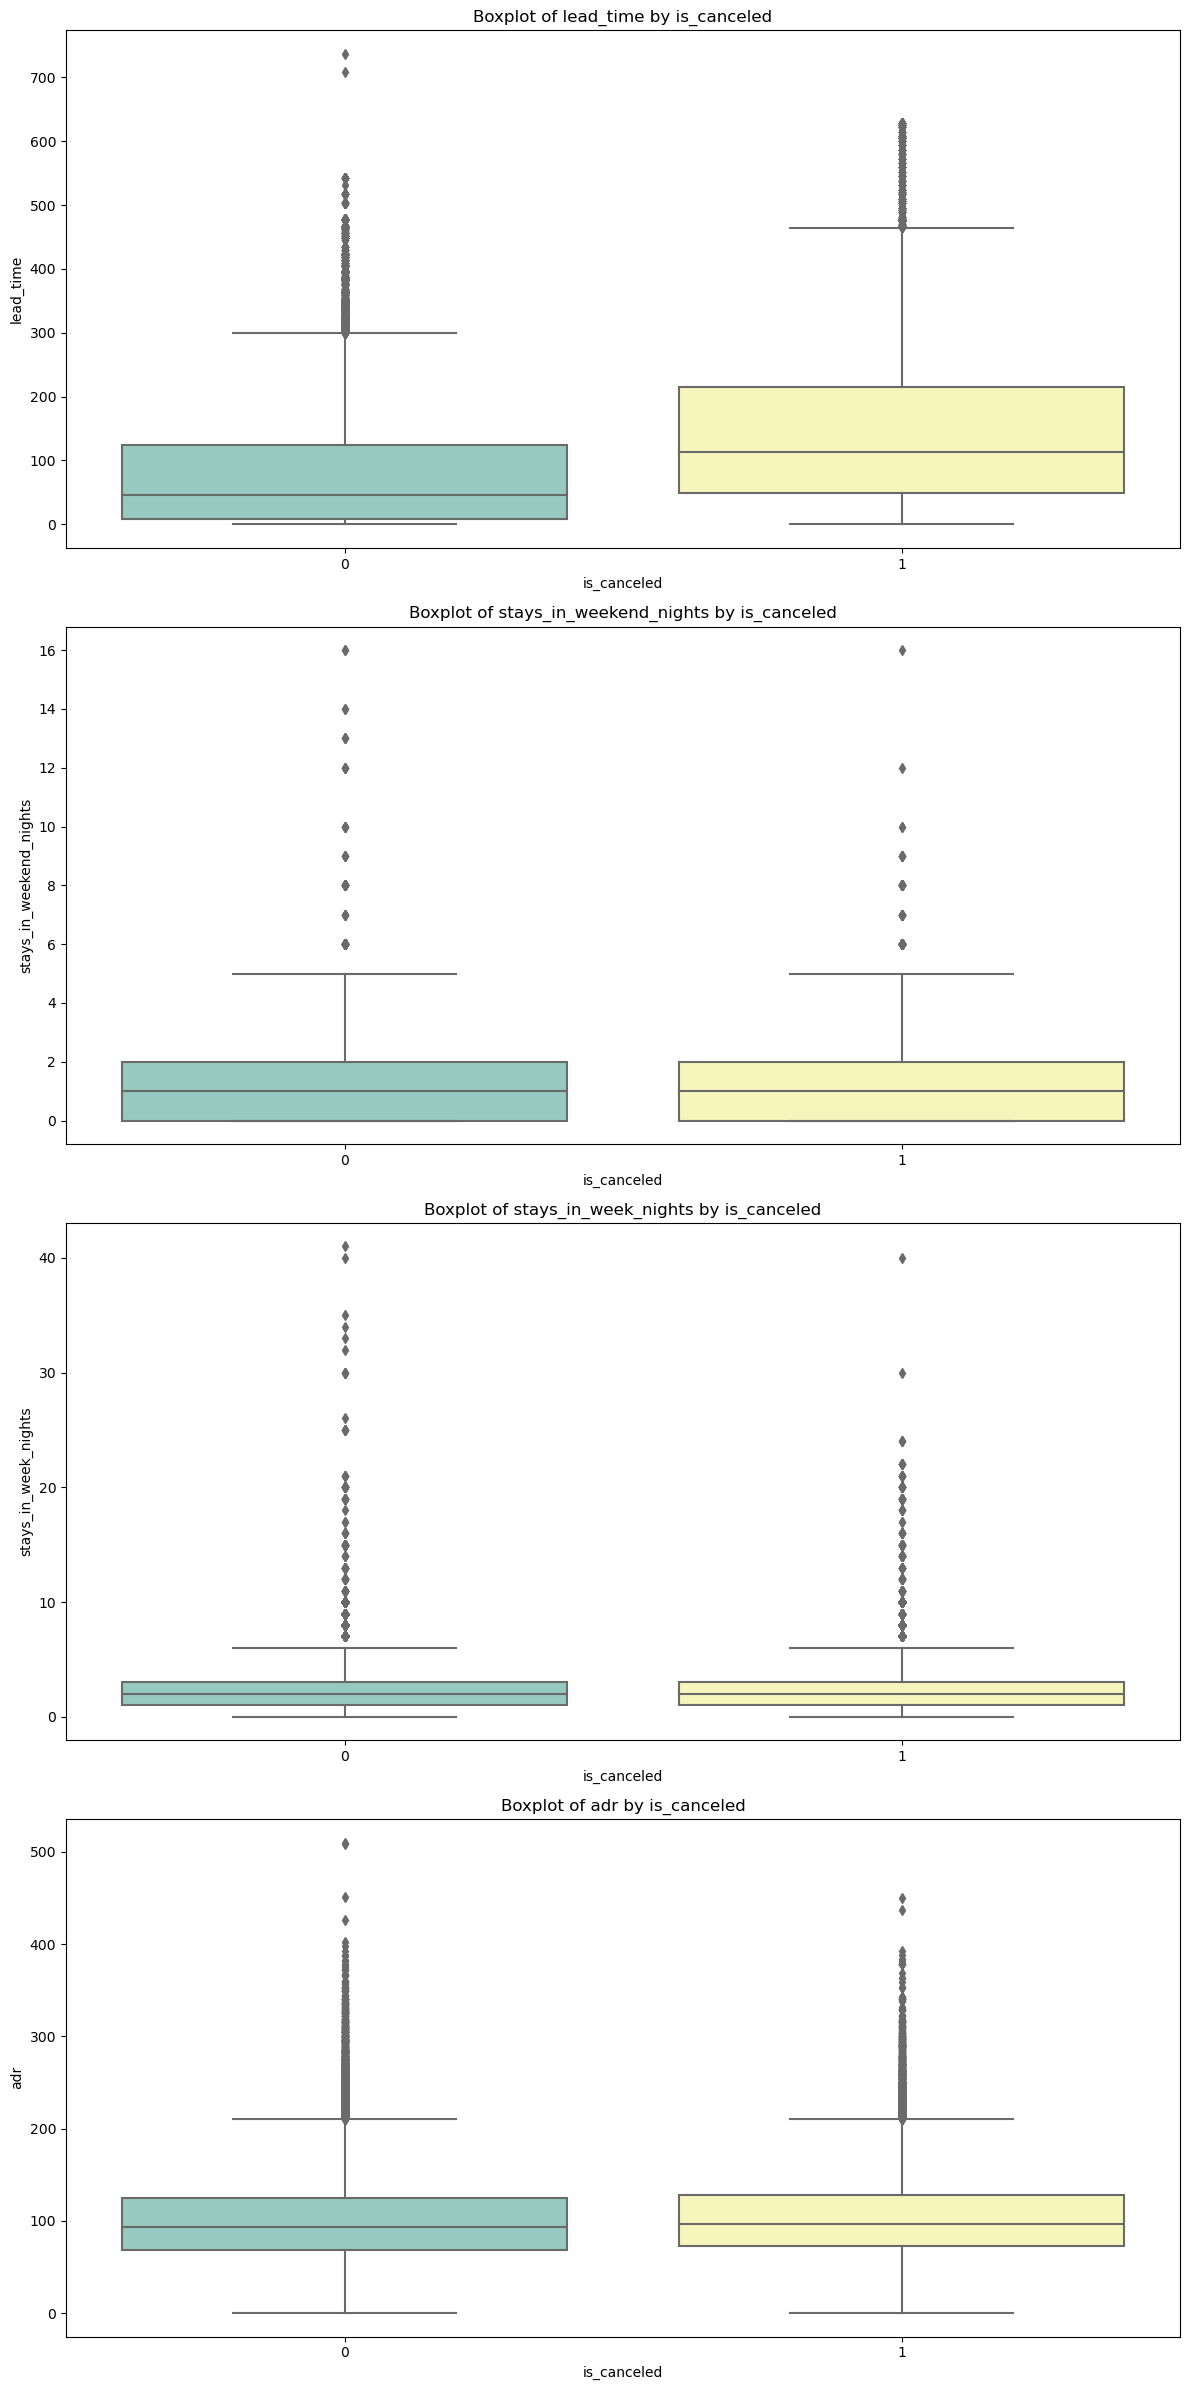

In [120]:
#Boxplot of numeric variables over is canceled 
num_col = numeric_vars.columns

fig, axes = plt.subplots(nrows=len(num_col), ncols=1, figsize=(12, 24))

for i, var in enumerate(num_col):
    # Create boxplot
    sns.boxplot(x='is_canceled', y=var, data=hotel, ax=axes[i], palette='Set3')
    axes[i].set_xlabel('is_canceled')
    axes[i].set_ylabel(var)
    axes[i].set_title(f'Boxplot of {var} by is_canceled')

plt.tight_layout()
plt.show()


array([[<AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>],
       [<AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'adr'}>]], dtype=object)

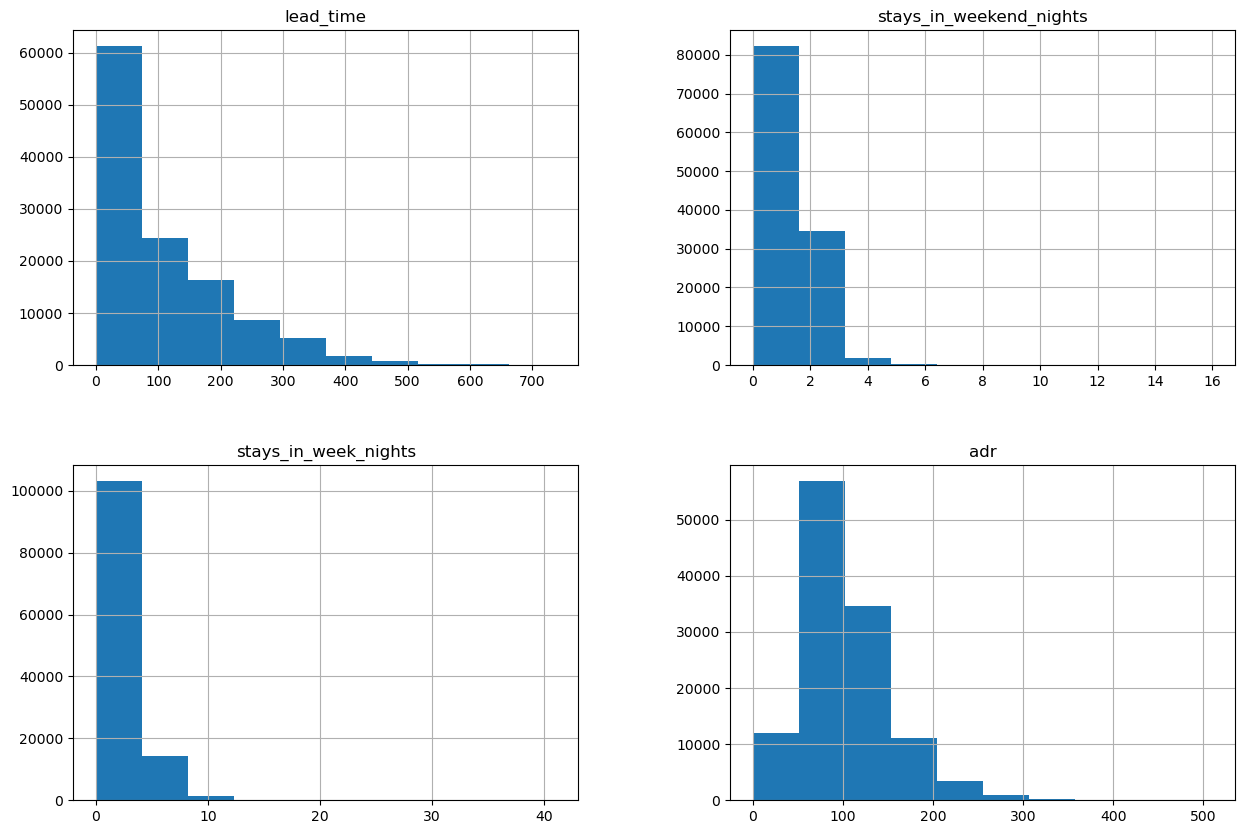

In [121]:
#Distribution of numeric variables
numeric_vars.hist(figsize = (15,10))

In [122]:
numeric_vars.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr
count,118896.000000,118896.000000,118896.000000,118896.000000
mean,104.311255,0.928879,2.502128,101.959594
std,106.903696,0.996181,1.900152,48.090374
min,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,1.000000,70.000000
50%,69.000000,1.000000,2.000000,95.000000
75%,161.000000,2.000000,3.000000,126.000000
max,737.000000,16.000000,41.000000,510.000000


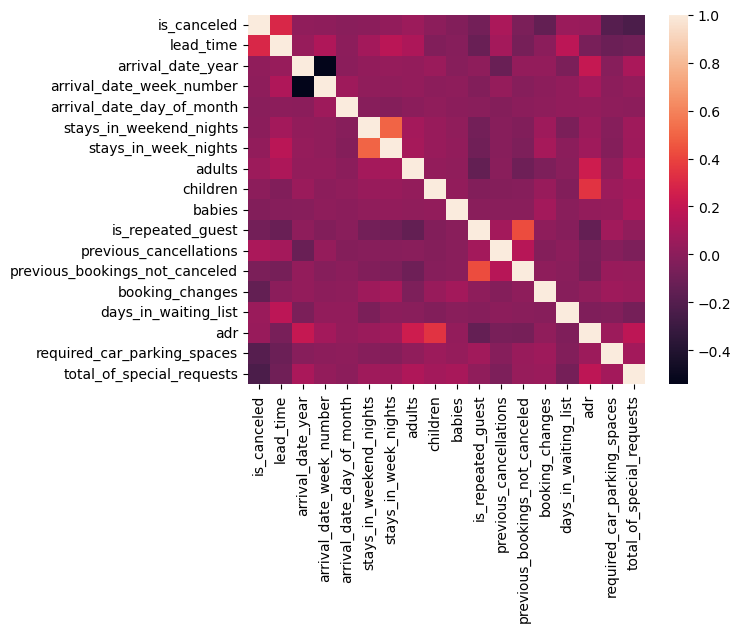

In [123]:
#Correlation Matrix
num_col = hotel.select_dtypes(include = ['int64', 'float64']).columns.tolist()
num_data = hotel[num_col]
corr = num_data.corr()
sns.heatmap(corr)
plt.show()

## Feature Selection

### Linear Regresion

In [124]:
#Selecting relevant features for regression
X = hotel.drop(['adr', 'reservation_status', 'reservation_status_date'], axis=1)
#Setting Target variable
y = hotel['adr']
#Encoding categorical variables
one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month', 'deposit_type', 'assigned_room_type', 'babies', 'country']
enc = OneHotEncoder(sparse=False)
#Fitting encoding and fixing column names
result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)
X_encoded = sm.add_constant(X_encoded)
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y.reset_index(drop = True), test_size = 0.2, random_state = 100)

#Fitting regression and printing summary
reg1 = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_pred = reg1.predict(X_test)
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    adr   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     638.5
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:47:12   Log-Likelihood:            -4.5759e+05
No. Observations:               95116   AIC:                         9.157e+05
Df Residuals:                   94876   BIC:                         9.179e+05
Df Model:                         239                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1.108e+04    135.913    -81.528      0.000   -1.13e+04   -1.08e+04
is_canceled                        4.2027      0.263     15.977      0.000       3.687       4.718
lead_time                         -0.0963      0.001    -80.546      0.000      -0.099      -0.094
arrival_date_year                 17.3596      0.211     82.364      0.000      16.947      17.773
arrival_date_week_number          -0.3813      0.251     -1.517      0.129      -0.874       0.111
arrival_date_day_of_month          0.2059      0.038      5.464      0.000       0.132       0.280
stays_in_weekend_nights           -0.8246      0.115     -7.144      0.000      -1.051      -0.598
stays_in_week_nights               0.8198      0.063     13.025      0.000       0.696       0.943
adults                             6.9017      0.188     36.615      0.000       6.532       7.271
children                          12.3864      0.326     37.994      0.000      11.747      13.025
is_repeated_guest                -13.6323      0.647    -21.060      0.000     -14.901     -12.364
previous_cancellations            -0.8900      0.116     -7.651      0.000      -1.118      -0.662
previous_bookings_not_canceled    -0.2183      0.074     -2.934      0.003      -0.364      -0.072
booking_changes                    0.7553      0.156      4.836      0.000       0.449       1.061
days_in_waiting_list               0.0596      0.006     10.659      0.000       0.049       0.071
required_car_parking_spaces        6.5656      0.423     15.517      0.000       5.736       7.395
total_of_special_requests          2.1199      0.142     14.893      0.000       1.841       2.399
hotel_City Hotel               -5528.0942     67.958    -81.345      0.000   -5661.292   -5394.897
hotel_Resort Hotel             -5552.6333     67.954    -81.711      0.000   -5685.823   -5419.443
meal_BB                        -2235.2039     27.180    -82.236      0.000   -2288.477   -2181.931
meal_FB                        -2191.5696     27.159    -80.694      0.000   -2244.801   -2138.339
meal_HB                        -2207.9019     27.172    -81.255      0.000   -2261.159   -2154.644
meal_SC                        -2250.0344     27.206    -82.702      0.000   -2303.359   -2196.710
meal_Undefined                 -2196.0176     27.235    -80.633      0.000   -2249.397   -2142.638
market_segment_Aviation        -1573.6719     19.547    -80.506      0.000   -1611.984   -1535.360
market_segment_Complementary   -1662.7871     19.448    -85.500      0.000   -1700.905   -1624.670
market_segment_Corporate       -1574.5492     19.418    -81.085      0.000   -1612.609   -1536.489
market_segment_Direct          -1559.2740     19.429    -80.256      0.000   -1597.354   -1521.194
market_segment

In [125]:
#Repeating previous procedure with different encoder for country
X = hotel.drop(['adr', 'reservation_status', 'reservation_status_date'], axis=1)
y = hotel['adr']
#One hot for most categorical variables
one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month', 'deposit_type', 'assigned_room_type', 'days_in_waiting_list', 'babies']
#Using label encoder for country column
le = LabelEncoder()
X['country'] = le.fit_transform(X[label_enc])
enc = OneHotEncoder(sparse=False)

result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)
X_encoded = sm.add_constant(X_encoded)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y.reset_index(drop = True), test_size = 0.2, random_state = 100)


reg1 = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_pred = reg1.predict(X_test)
reg1.summary()

C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    adr   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     806.5
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:47:15   Log-Likelihood:            -4.5733e+05
No. Observations:               95116   AIC:                         9.150e+05
Df Residuals:                   94924   BIC:                         9.169e+05
Df Model:                         191                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1.105e+04    134.771    -82.022      0.000   -1.13e+04   -1.08e+04
is_canceled                        4.7202      0.254     18.559      0.000       4.222       5.219
lead_time                         -0.1001      0.001    -84.924      0.000      -0.102      -0.098
arrival_date_year                 17.3368      0.209     82.900      0.000      16.927      17.747
arrival_date_week_number          -0.7918      0.252     -3.146      0.002      -1.285      -0.298
arrival_date_day_of_month          0.2452      0.038      6.498      0.000       0.171       0.319
stays_in_weekend_nights           -0.6955      0.115     -6.028      0.000      -0.922      -0.469
stays_in_week_nights               0.6231      0.062      9.988      0.000       0.501       0.745
adults                             7.2026      0.188     38.245      0.000       6.833       7.572
children                          12.5678      0.324     38.741      0.000      11.932      13.204
country                           -0.0010      0.002     -0.413      0.680      -0.006       0.004
is_repeated_guest                -13.7743      0.643    -21.410      0.000     -15.035     -12.513
previous_cancellations            -1.0194      0.116     -8.762      0.000      -1.247      -0.791
previous_bookings_not_canceled    -0.2362      0.074     -3.184      0.001      -0.382      -0.091
booking_changes                    0.7335      0.156      4.709      0.000       0.428       1.039
required_car_parking_spaces        7.3007      0.419     17.407      0.000       6.479       8.123
total_of_special_requests          2.1247      0.142     15.003      0.000       1.847       2.402
hotel_City Hotel               -5514.5857     67.389    -81.832      0.000   -5646.667   -5382.504
hotel_Resort Hotel             -5539.5947     67.382    -82.212      0.000   -5671.663   -5407.526
meal_BB                        -2230.4543     26.953    -82.755      0.000   -2283.281   -2177.628
meal_FB                        -2185.2571     26.927    -81.153      0.000   -2238.035   -2132.480
meal_HB                        -2202.8260     26.943    -81.759      0.000   -2255.634   -2150.018
meal_SC                        -2245.5221     26.982    -83.224      0.000   -2298.406   -2192.638
meal_Undefined                 -2190.1210     27.007    -81.095      0.000   -2243.054   -2137.188
market_segment_Aviation        -1568.7404     19.376    -80.963      0.000   -1606.717   -1530.764
market_segment_Complementary   -1659.2297     19.281    -86.057      0.000   -1697.019   -1621.440
market_segment_Corporate       -1570.4485     19.250    -81.581      0.000   -1608.179   -1532.718
market_segment_Direct          -1555.1034     19.268    -80.709      0.000   -1592.868   -1517.338
market_segment

In [126]:
#Repeating procedure with relevant columns for regression
X = hotel.drop(['adr', 'reservation_status', 'reservation_status_date', 'assigned_room_type', 'days_in_waiting_list', 'babies', 'country'], axis=1)
y = hotel['adr']

one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month', 'deposit_type']


enc = OneHotEncoder(sparse=False)

result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)
X_encoded = sm.add_constant(X_encoded)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y.reset_index(drop = True), test_size = 0.2, random_state = 100)


reg1 = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_pred = reg1.predict(X_test)
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    adr   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     2670.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:47:17   Log-Likelihood:            -4.5876e+05
No. Observations:               95116   AIC:                         9.176e+05
Df Residuals:                   95060   BIC:                         9.182e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1.214e+04    151.049    -80.375      0.000   -1.24e+04   -1.18e+04
is_canceled                        4.8057      0.250     19.249      0.000       4.316       5.295
lead_time                         -0.0992      0.001    -84.393      0.000      -0.102      -0.097
arrival_date_year                 16.9721      0.209     81.199      0.000      16.562      17.382
arrival_date_week_number          -0.4269      0.253     -1.689      0.091      -0.922       0.068
arrival_date_day_of_month          0.2125      0.038      5.606      0.000       0.138       0.287
stays_in_weekend_nights           -1.0156      0.116     -8.775      0.000      -1.242      -0.789
stays_in_week_nights               0.7464      0.063     11.928      0.000       0.624       0.869
adults                             7.1711      0.189     37.904      0.000       6.800       7.542
children                          12.6949      0.328     38.729      0.000      12.052      13.337
is_repeated_guest                -15.5230      0.648    -23.950      0.000     -16.793     -14.253
previous_cancellations            -0.9545      0.117     -8.125      0.000      -1.185      -0.724
previous_bookings_not_canceled    -0.1272      0.075     -1.692      0.091      -0.274       0.020
booking_changes                    0.4686      0.156      3.000      0.003       0.162       0.775
required_car_parking_spaces        7.5268      0.425     17.711      0.000       6.694       8.360
total_of_special_requests          2.1956      0.143     15.388      0.000       1.916       2.475
hotel_City Hotel               -6057.6635     75.530    -80.202      0.000   -6205.702   -5909.625
hotel_Resort Hotel             -6082.9740     75.519    -80.549      0.000   -6230.990   -5934.958
meal_BB                        -2447.8093     30.207    -81.034      0.000   -2507.015   -2388.603
meal_FB                        -2402.8691     30.184    -79.609      0.000   -2462.029   -2343.710
meal_HB                        -2420.2328     30.199    -80.143      0.000   -2479.423   -2361.043
meal_SC                        -2463.6364     30.239    -81.472      0.000   -2522.905   -2404.368
meal_Undefined                 -2406.0898     30.257    -79.523      0.000   -2465.392   -2346.787
market_segment_Aviation        -1723.7563     21.695    -79.453      0.000   -1766.279   -1681.234
market_segment_Complementary   -1814.2202     21.594    -84.014      0.000   -1856.545   -1771.896
market_segment_Corporate       -1725.6528     21.569    -80.005      0.000   -1767.928   -1683.377
market_segment_Direct          -1710.4691     21.593    -79.215      0.000   -1752.790   -1668.148
market_segment_Groups          -1731.7337     21.579    -80.253      0.000   -1774.027   -1689.440
market_segment

In [127]:
#Calculating mean squared error for train and test
mse_train = mean_squared_error(y_train,reg1.predict(X_train) )
print("train error: ", mse_train)
mse_test = mean_squared_error(y_test, y_pred)
print("test_error: ", mse_test)

train error:  905.44572033154
test_error:  952.6452571122995


In [128]:
#Repeating the procedure for logarithmic transformation of target variable

X = hotel.drop(['adr', 'reservation_status', 'reservation_status_date', 'deposit_type', 'assigned_room_type', 'days_in_waiting_list', 'distribution_channel', 'babies'], axis=1)
#Adding a small constant because we have many values with 0 and gives log error
y_2 = np.log(hotel['adr'] + 1**-10)

one_hot = ['hotel', 'meal', 'market_segment', 'customer_type','reserved_room_type', 'arrival_date_month']
label_enc = ['country']
le = LabelEncoder()
X['country'] = le.fit_transform(X[label_enc])
enc = OneHotEncoder(sparse=False)

result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded_2 = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)
X_encoded_2 = sm.add_constant(X_encoded_2)
X_train, X_test, y_train, y_test = train_test_split(X_encoded_2, y_2.reset_index(drop = True), test_size = 0.2, random_state = 100)


reg2 = sm.OLS(y_train, X_train).fit()
y_pred = reg2.predict(X_test)
reg2.summary()

C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    adr   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     1704.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:47:17   Log-Likelihood:                -74444.
No. Observations:               95116   AIC:                         1.490e+05
Df Residuals:                   95065   BIC:                         1.495e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -149.2566      3.292    -45.340      0.000    -155.709    -142.804
is_canceled                        0.1121      0.004     26.106      0.000       0.104       0.120
lead_time                         -0.0007   2.02e-05    -32.811      0.000      -0.001      -0.001
arrival_date_year                  0.1700      0.004     46.072      0.000       0.163       0.177
arrival_date_week_number           0.0164      0.004      3.699      0.000       0.008       0.025
arrival_date_day_of_month         -0.0009      0.001     -1.317      0.188      -0.002       0.000
stays_in_weekend_nights           -0.0058      0.002     -2.851      0.004      -0.010      -0.002
stays_in_week_nights               0.0170      0.001     15.420      0.000       0.015       0.019
adults                             0.0679      0.003     20.444      0.000       0.061       0.074
children                           0.0757      0.006     13.140      0.000       0.064       0.087
country                           -0.0003   4.36e-05     -7.480      0.000      -0.000      -0.000
is_repeated_guest                 -0.5104      0.011    -44.751      0.000      -0.533      -0.488
previous_cancellations            -0.0138      0.002     -6.729      0.000      -0.018      -0.010
previous_bookings_not_canceled     0.0125      0.001      9.496      0.000       0.010       0.015
booking_changes                   -0.0364      0.003    -13.274      0.000      -0.042      -0.031
required_car_parking_spaces        0.1602      0.007     21.459      0.000       0.146       0.175
total_of_special_requests          0.0285      0.003     11.347      0.000       0.024       0.033
hotel_City Hotel                 -74.4321      1.646    -45.219      0.000     -77.658     -71.206
hotel_Resort Hotel               -74.8245      1.646    -45.460      0.000     -78.051     -71.598
meal_BB                          -30.0669      0.658    -45.670      0.000     -31.357     -28.777
meal_FB                          -29.5196      0.658    -44.873      0.000     -30.809     -28.230
meal_HB                          -29.7875      0.658    -45.258      0.000     -31.078     -28.498
meal_SC                          -30.2654      0.659    -45.932      0.000     -31.557     -28.974
meal_Undefined                   -29.6171      0.659    -44.930      0.000     -30.909     -28.325
market_segment_Aviation          -20.7424      0.472    -43.908      0.000     -21.668     -19.816
market_segment_Complementary     -24.8200      0.471    -52.752      0.000     -25.742     -23.898
market_segment_Corporate         -20.7511      0.470    -44.106      0.000     -21.673     -19.829
market_segment_Direct            -20.6388      0.470    -43.881      0.000     -21.561     -19.717
market_segment

In [129]:
mse_train = mean_squared_error(y_train,reg2.predict(X_train) )
print("train error: ", mse_train)
mse_test = mean_squared_error(y_test, y_pred)
print("test_error: ", mse_test)

train error:  0.280118001449088
test_error:  0.29991161367693575


Text(0.5, 1.0, 'QQ Plot for Model 2')

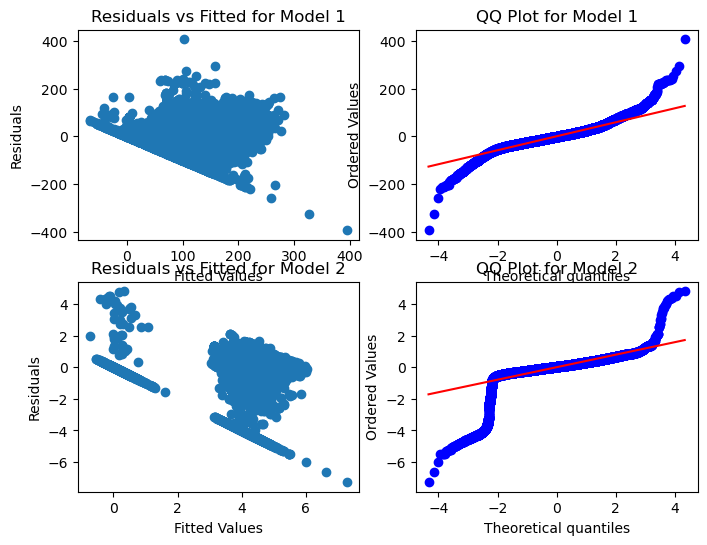

In [130]:
#Plotting to check assumptions.  Many are violated
fig, ax = plt.subplots(2,2, figsize=(8,6))
ax[0,0].scatter(reg1.fittedvalues, reg1.resid)
ax[0,0].set_xlabel('Fitted Values')
ax[0,0].set_ylabel('Residuals')
ax[0,0].set_title('Residuals vs Fitted for Model 1')

stats.probplot(reg1.resid, plot=ax[0,1])
ax[0,1].set_title('QQ Plot for Model 1')

ax[1,0].scatter(reg2.fittedvalues, reg2.resid)
ax[1,0].set_xlabel('Fitted Values')
ax[1,0].set_ylabel('Residuals')
ax[1,0].set_title('Residuals vs Fitted for Model 2')

stats.probplot(reg2.resid, plot=ax[1,1])
ax[1,1].set_title('QQ Plot for Model 2')

### Random Forest Regressor

In [131]:
#Selecting relevant features for random forest regressor
X = hotel.drop(['adr', 'reservation_status', 'reservation_status_date', 'assigned_room_type', 'days_in_waiting_list', 'babies'], axis=1)
# Setting target variable
y = hotel['adr']
#Encoding
one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month', 'deposit_type']
le = LabelEncoder()
X['country'] = le.fit_transform(X[label_enc])

enc = OneHotEncoder(sparse=False)
#Setting feature names correctly
result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y.reset_index(drop = True), test_size = 0.2, random_state = 100)
#Training model
rf = RandomForestRegressor(random_state = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
#Calculating mean squared error
mse = mean_squared_error(y_test, y_pred)
mse

C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


280.07382606882953

In [132]:
# Analyzing feature importance itterating with previous code
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
pd.set_option('display.max_rows', None)
print("Variable importances:")
print(importances)
print(len(importances))

Variable importances:
reserved_room_type_A              1.369608e-01
arrival_date_week_number          1.223160e-01
arrival_date_month_August         7.362314e-02
lead_time                         7.043428e-02
hotel_City Hotel                  5.754993e-02
arrival_date_year                 5.032443e-02
hotel_Resort Hotel                4.749798e-02
arrival_date_month_July           4.063379e-02
arrival_date_day_of_month         3.725070e-02
adults                            3.656765e-02
market_segment_Online TA          2.916146e-02
children                          2.726532e-02
market_segment_Complementary      2.312264e-02
market_segment_Offline TA/TO      2.126670e-02
meal_BB                           1.993465e-02
meal_HB                           1.974378e-02
stays_in_week_nights              1.964136e-02
reserved_room_type_F              1.434602e-02
reserved_room_type_G              1.273922e-02
stays_in_weekend_nights           1.261230e-02
country                           1.25

### Gradient Boosting Regressor

In [133]:
#Repeating procedure for Gradient boosting
X = hotel.drop(['adr', 'reservation_status', 'reservation_status_date', 'assigned_room_type', 'days_in_waiting_list', 'babies', 'total_of_special_requests', 'required_car_parking_spaces'], axis=1)
y = hotel['adr']

one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month', 'deposit_type']
le = LabelEncoder()
X['country'] = le.fit_transform(X[label_enc])
enc = OneHotEncoder(sparse=False)

result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y.reset_index(drop = True), test_size = 0.2, random_state = 100)



gb = GradientBoostingRegressor(random_state = 100)
gb.fit(X_train, y_train)
y_preds = gb.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


634.9628823831226

In [134]:
#Analyzing feature importance
importances = gb.feature_importances_
features = list(X.columns)
feature_importances = list(zip(features, importances))
print("Feature importances:")
for feature in feature_importances:
    print(feature[0], ": ", feature[1])

Feature importances:
hotel :  0.0011761766558738296
is_canceled :  0.03242117756185281
lead_time :  0.04635543259862828
arrival_date_year :  0.1834544077155955
arrival_date_month :  0.005342757595963395
arrival_date_week_number :  0.018060141230795648
arrival_date_day_of_month :  0.004294237644119787
stays_in_weekend_nights :  0.06546875742495083
stays_in_week_nights :  0.08002220261485868
adults :  0.0003180005098299527
children :  0.003404839596445326
meal :  3.0278933536958376e-05
country :  0.0
market_segment :  0.0
distribution_channel :  0.039185016973561596
is_repeated_guest :  0.06322847096546881
previous_cancellations :  0.009453008814790028
previous_bookings_not_canceled :  0.0020005766133130783
reserved_room_type :  0.03384949672417224
booking_changes :  0.003744441667806627
deposit_type :  0.0035352786328370044
customer_type :  0.0


### Logistic Regression Classifier

In [135]:
#Repeating procedure for logistic regression
X = hotel.drop(['is_canceled','reservation_status', 'reservation_status_date', 'days_in_waiting_list', 'babies', 'assigned_room_type'], axis=1)
y = hotel['is_canceled']

one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month', 'deposit_type', 'country']
enc = OneHotEncoder(sparse=False)

result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y.reset_index(drop = True), test_size = 0.2, random_state = 100)

lr = LogisticRegression(random_state = 100)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
#printing classification report to test errors
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85     15052
           1       0.80      0.61      0.69      8728

    accuracy                           0.80     23780
   macro avg       0.80      0.76      0.77     23780
weighted avg       0.80      0.80      0.79     23780



C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree Classifier

In [136]:
#Repeating procedure for decision tree
X = hotel.drop(['is_canceled', 'reservation_status', 'reservation_status_date', 'babies', 'assigned_room_type', 'days_in_waiting_list'], axis=1)
y = hotel['is_canceled']

one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month', 'deposit_type']
enc = OneHotEncoder(sparse=False)
le = LabelEncoder()
X['country'] = le.fit_transform(X[label_enc])

result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y.reset_index(drop = True), test_size = 0.2, random_state = 100)

dt = DecisionTreeClassifier(random_state = 100)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred))

C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.88      0.87      0.88     15052
           1       0.79      0.80      0.79      8728

    accuracy                           0.85     23780
   macro avg       0.83      0.84      0.84     23780
weighted avg       0.85      0.85      0.85     23780



In [137]:
#Analyzing feature importances
importances = dt.feature_importances_
features = list(X.columns)
feature_importances = list(zip(features, importances))
print("Feature importances:")
for feature in feature_importances:
    print(feature[0], ": ", feature[1])

Feature importances:
hotel :  0.12036366873761149
lead_time :  0.03172547822181027
arrival_date_year :  0.04906027958578113
arrival_date_month :  0.051564954498863114
arrival_date_week_number :  0.021964561070409505
arrival_date_day_of_month :  0.031954277827784684
stays_in_weekend_nights :  0.009911660997794976
stays_in_week_nights :  0.0052921493059825365
adults :  0.08191865549075178
children :  0.0009375554512475873
meal :  0.022538905786625783
country :  0.005571816880339662
market_segment :  0.015618188061832745
distribution_channel :  0.07804422243484614
is_repeated_guest :  0.022538537539470667
previous_cancellations :  0.05285363727321851
previous_bookings_not_canceled :  0.004269174787513647
reserved_room_type :  0.0053217359864341255
booking_changes :  0.003972841172174245
deposit_type :  0.0010948808102187579
customer_type :  0.003204106037009733
adr :  0.00358649300182441
required_car_parking_spaces :  0.0017147032559410248
total_of_special_requests :  0.000442444454372209

### Random Forest Classifier

In [138]:
#Repeating procedure for Random Forest Classifier
X = hotel.drop(['is_canceled', 'reservation_status', 'reservation_status_date', 'assigned_room_type', 'days_in_waiting_list'], axis=1)
y = hotel['is_canceled']

one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month', 'deposit_type']
label_enc = ['country']
enc = OneHotEncoder(sparse=False)
le = LabelEncoder()
X['country'] = le.fit_transform(X[label_enc])

result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y.reset_index(drop = True), test_size = 0.2, random_state = 100)

rfc = RandomForestClassifier(random_state = 100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))

C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.89      0.94      0.91     15052
           1       0.88      0.80      0.84      8728

    accuracy                           0.89     23780
   macro avg       0.88      0.87      0.87     23780
weighted avg       0.88      0.89      0.88     23780



In [139]:
importances = rfc.feature_importances_
features = list(X.columns)
feature_importances = list(zip(features, importances))
print("Feature importances:")
for feature in feature_importances:
    print(feature[0], ": ", feature[1])

Feature importances:
hotel :  0.12409154688153429
lead_time :  0.023440091858117903
arrival_date_year :  0.04764757257207712
arrival_date_month :  0.05653919732116839
arrival_date_week_number :  0.024456436345354642
arrival_date_day_of_month :  0.037960117186714826
stays_in_weekend_nights :  0.013918242140758088
stays_in_week_nights :  0.006210195585200062
adults :  0.0008805546919782421
children :  0.10873942959370121
babies :  0.0024132967075860237
meal :  0.030337443572520387
country :  0.004561717389073347
market_segment :  0.01853929636837876
distribution_channel :  0.07726141179112973
is_repeated_guest :  0.02228719058269251
previous_cancellations :  0.05404958941036604
previous_bookings_not_canceled :  0.006184848907592842
reserved_room_type :  0.006938052916928608
booking_changes :  0.006459631282567075
deposit_type :  0.0009609093831488348
customer_type :  0.00444502650773443
adr :  0.003641749178951541
required_car_parking_spaces :  0.0009349759355620217
total_of_special_requ

## Regression

### Random Forest Regressor

In [140]:
#Selecting previously chosen features
X = hotel.drop(['adr', 'reservation_status', 'reservation_status_date', 'assigned_room_type', 'days_in_waiting_list', 'babies'], axis=1)
#Setting target variable
y = hotel['adr']
#Encoding
one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month', 'deposit_type']
le = LabelEncoder()
X['country'] = le.fit_transform(X[label_enc])

enc = OneHotEncoder(sparse=False)
#Setting correct column names
result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y.reset_index(drop = True), test_size = 0.2, random_state = 100)
#Setting task
rf = RandomForestRegressor()
#Selecting parameter grid to search
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None,20,30],
    'min_samples_split': [2,5,10],
    'random_state': [100]
}
#Fitting grid search for parameters with cross validation
grid_search = GridSearchCV(
    rf, param_grid, cv = 4, n_jobs = -1, scoring = 'neg_mean_squared_error')
grid_search.fit(X_encoded,y)
#Printing best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)
print('Best mean squared error:', -grid_search.best_score_)

C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best hyperparameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 200, 'random_state': 100}
Best mean squared error: 897.7782658531207


In [141]:
#Adjusting model for best hyperparameters
rf = RandomForestRegressor(max_depth = grid_search.best_params_['max_depth'], min_samples_split = grid_search.best_params_['min_samples_split'], n_estimators = grid_search.best_params_['n_estimators'], random_state = 100)
#Fitting
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
#Calculating error by mean squared error
mse = mean_squared_error(y_test, y_pred)
mse

289.670196262097

### Gradient Boosting Regressor

In [142]:
#Repeating same procedure for gradient boosting
X = hotel.drop(['adr', 'reservation_status', 'reservation_status_date', 'assigned_room_type', 'days_in_waiting_list', 'babies', 'total_of_special_requests', 'required_car_parking_spaces'], axis=1)
y = hotel['adr']

one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month', 'deposit_type']
le = LabelEncoder()
X['country'] = le.fit_transform(X[label_enc])
enc = OneHotEncoder(sparse=False)

result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y.reset_index(drop = True), test_size = 0.2, random_state = 100)

gb = GradientBoostingRegressor(random_state = 100)

param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3,4,5],
    'n_estimators': [100,200]
}

grid_searchgb = GridSearchCV(gb, param_grid=param_grid, cv=3, n_jobs=-1)
grid_searchgb.fit(X_encoded, y)

print('Best parameters:', grid_searchgb.best_params_)
print('Best score:', grid_searchgb.best_score_)

C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters: {'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 200}
Best score: 0.5566127529742495


In [143]:
#Fitting model with best hyperparamters
gb = GradientBoostingRegressor(
    learning_rate = grid_searchgb.best_params_['learning_rate'], 
    max_depth = grid_searchgb.best_params_['max_depth'], 
    n_estimators = grid_searchgb.best_params_['n_estimators'], random_state = 100)
gb.fit(X_train, y_train)
y_preds = gb.predict(X_test)
#Calculating error
mse = mean_squared_error(y_test, y_preds)
mse

332.9095860457814

## Classification

### Logistic Regression Classifier

In [144]:
#Selecting previously chosen features
X = hotel.drop(['is_canceled','reservation_status', 'reservation_status_date', 'days_in_waiting_list', 'babies', 'assigned_room_type'], axis=1)
#Setting target variable
y = hotel['is_canceled']
#Setting Encoder for categorical variables
one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month', 'deposit_type', 'country']
enc = OneHotEncoder(sparse=False)
#Setting correct column names
result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y.reset_index(drop = True), test_size = 0.2, random_state = 100)
#Selecting parameter grid for search
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
#Selecting task and fittin grid search with cross validation
lr = LogisticRegression(random_state = 100)
grid_search = GridSearchCV(lr, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
#Printing best parameters
print("Best hyperparameters:", grid_search.best_params_)

C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
162 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


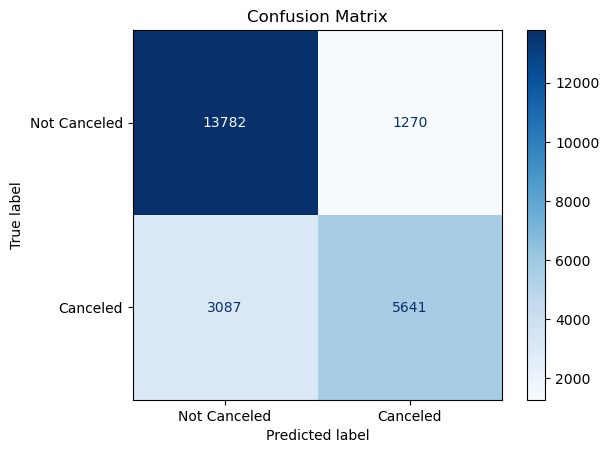

In [145]:
#Fitting model with selected hyperparameters
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = ['Not Canceled', 'Canceled']
# Plotting confusion matrix
plot_confusion_matrix(best_model, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [146]:
#Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86     15052
           1       0.82      0.65      0.72      8728

    accuracy                           0.82     23780
   macro avg       0.82      0.78      0.79     23780
weighted avg       0.82      0.82      0.81     23780



### Decision Tree Clasifier

In [147]:
#Repeating procedure for Decision Trees
X = hotel.drop(['is_canceled', 'reservation_status', 'reservation_status_date', 'babies', 'assigned_room_type', 'days_in_waiting_list'], axis=1)
y = hotel['is_canceled']

one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month', 'deposit_type']
enc = OneHotEncoder(sparse=False)
le = LabelEncoder()
X['country'] = le.fit_transform(X[label_enc])

result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y.reset_index(drop = True), test_size = 0.2, random_state = 100)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y.reset_index(drop = True), test_size = 0.2, random_state = 100)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3,4,5,6,7,None],
    'min_samples_leaf': range(2,8),
    'min_samples_split': range(2,8),
}

dt = DecisionTreeClassifier(random_state = 100)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,  cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)


C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


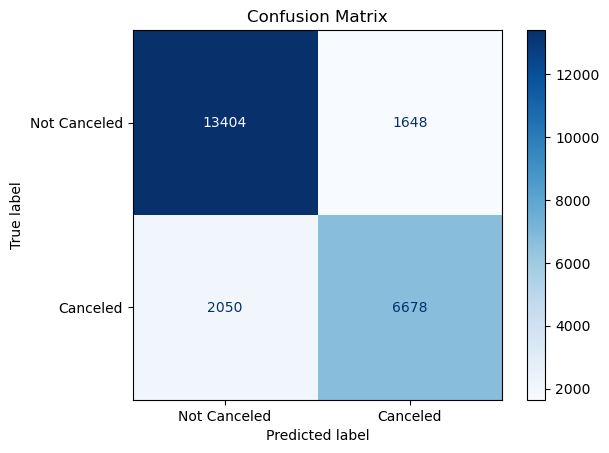

In [148]:
#Printing confusion matrix
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = ['Not Canceled', 'Canceled']

plot_confusion_matrix(best_model, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [149]:
# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     15052
           1       0.80      0.77      0.78      8728

    accuracy                           0.84     23780
   macro avg       0.83      0.83      0.83     23780
weighted avg       0.84      0.84      0.84     23780



### Bagging Classifier

In [151]:
# Repeating procedure for bagging classifier with decision trees as base model
base_estimator = best_model
param_grid = {
    'n_estimators': [10,50,100],
    'max_samples': [0.1, 0.3, 0.5, 1],
    'random_state': [100]
}

bagging = BaggingClassifier(base_estimator = base_estimator, random_state = 100)
grid_search = GridSearchCV(estimator = bagging, param_grid = param_grid, cv = 3, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_samples': 0.5, 'n_estimators': 100, 'random_state': 100}
Best score: 0.8736069616683658


C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


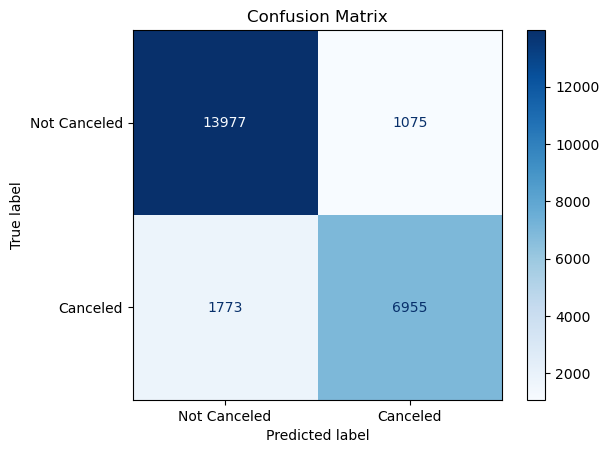

In [152]:
# Plotting confusion matrix
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = ['Not Canceled', 'Canceled']

plot_confusion_matrix(best_model, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [153]:
#Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     15052
           1       0.87      0.80      0.83      8728

    accuracy                           0.88     23780
   macro avg       0.88      0.86      0.87     23780
weighted avg       0.88      0.88      0.88     23780



### Random Forest Classifier

In [155]:
#Repeating procedure for Random Forest Classifier
X = hotel.drop(['is_canceled', 'reservation_status', 'reservation_status_date', 'assigned_room_type', 'days_in_waiting_list'], axis=1)
y = hotel['is_canceled']

one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month', 'deposit_type']
label_enc = ['country']
enc = OneHotEncoder(sparse=False)
le = LabelEncoder()
X['country'] = le.fit_transform(X[label_enc])

result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y.reset_index(drop = True), test_size = 0.2, random_state = 100)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [100]
}

rfc = RandomForestClassifier(random_state = 100)
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 100}


C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


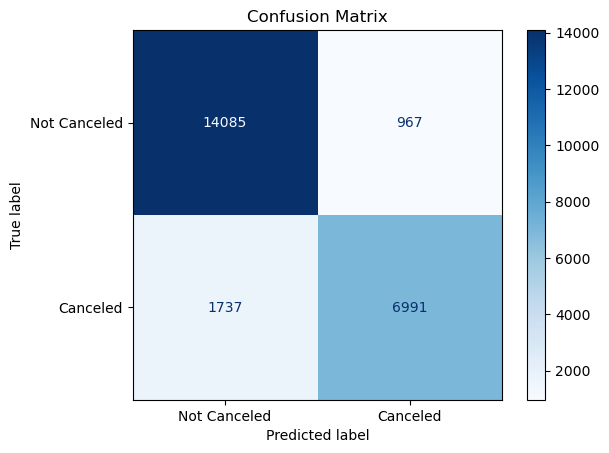

In [156]:
#Fitting best parameters 
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = ['Not Canceled', 'Canceled']
#Printing confusion matrix
plot_confusion_matrix(best_model, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [157]:
#printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     15052
           1       0.88      0.80      0.84      8728

    accuracy                           0.89     23780
   macro avg       0.88      0.87      0.88     23780
weighted avg       0.89      0.89      0.89     23780



## Unsupervised Learning - PCA

### Regression PCA

C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


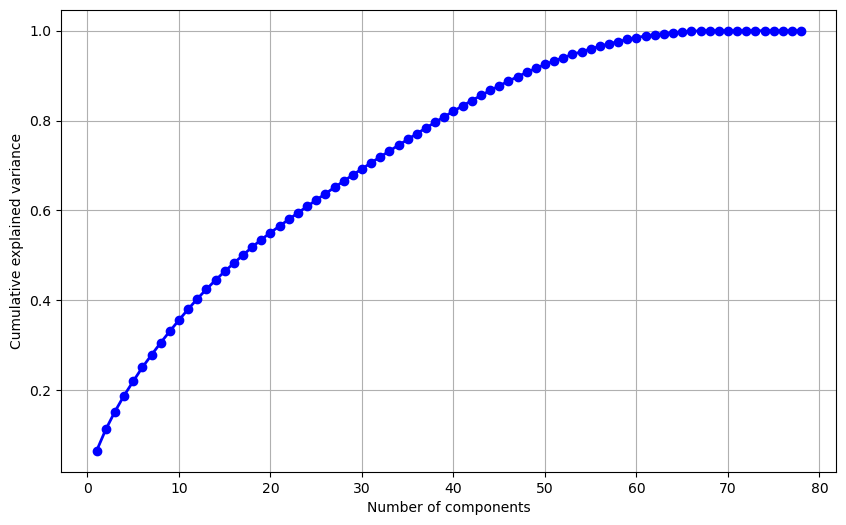

In [158]:
#Dropping irrelevant variables and target variable
X = hotel.drop(['reservation_status', 'reservation_status_date', 'adr'], axis=1)
# Encoding categorical variables
enc = OneHotEncoder(sparse=False)
one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month', 'deposit_type', 'assigned_room_type' ]
label_enc = ['country']
le = LabelEncoder()
X['country'] = le.fit_transform(X[label_enc])
result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)
#Scaling features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


# Transform the data
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#Plot cumulative variance over number of components
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, 'bo-', linewidth=2)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.show()

In [159]:
#Selecting first 60 components
X_pca = X_pca[:, :61]
y = hotel['adr']
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y.reset_index(drop = True), test_size = 0.2, random_state = 100)


In [160]:
#Starting task

rf = RandomForestRegressor()
#Selecting parameter grid for cross validation
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [10,20,30],
    'min_samples_split': [2,5,10],
    'random_state': [100]
}
#Excecuting grid search to select best parameters
grid_search = GridSearchCV(
    rf, param_grid, cv = 4, n_jobs = -1, scoring = 'neg_mean_squared_error')
grid_search.fit(X_encoded,y)
#Printing best parameters
print('Best hyperparameters:', grid_search.best_params_)
print('Best mean squared error:', -grid_search.best_score_)

Best hyperparameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 200, 'random_state': 100}
Best mean squared error: 885.3829963708934


In [161]:
#Fitting random forest with best parameters
rf = RandomForestRegressor(max_depth = grid_search.best_params_['max_depth'], min_samples_split = grid_search.best_params_['min_samples_split'], n_estimators = grid_search.best_params_['n_estimators'], random_state = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

403.0731204830048

C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


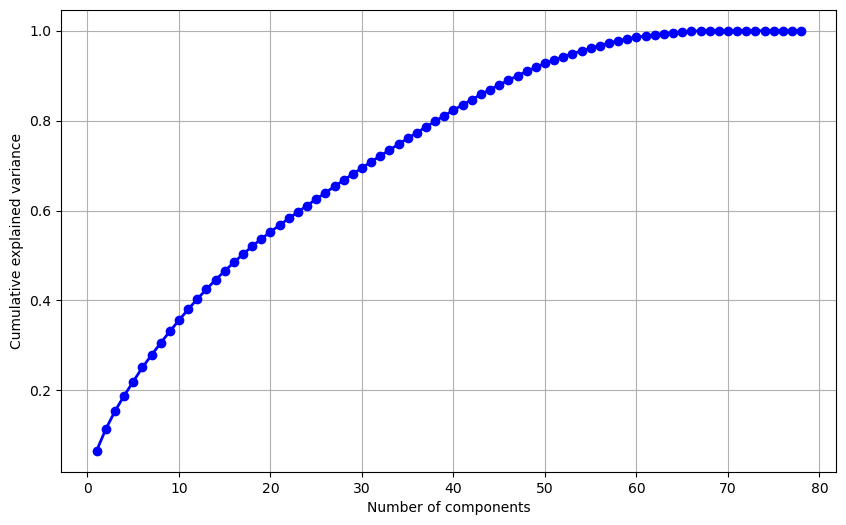

In [162]:
#Repeting PCA procedure for classifications.  Same steps than above
X = hotel.drop(['reservation_status', 'reservation_status_date', 'is_canceled'], axis=1)
y = hotel['is_canceled']
enc = OneHotEncoder(sparse=False)
one_hot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type','reserved_room_type', 'arrival_date_month', 'deposit_type', 'assigned_room_type' ]
label_enc = ['country']
le = LabelEncoder()
X['country'] = le.fit_transform(X[label_enc])
result = enc.fit_transform(X[one_hot])
results = pd.DataFrame(result, columns = enc.get_feature_names_out())
X_encoded = pd.concat([X.drop(one_hot, axis=1).reset_index(drop=True), results.reset_index(drop=True)], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


pca = PCA()
X_pca = pca.fit_transform(X_scaled)


var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, 'bo-', linewidth=2)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.show()

In [163]:
#Splitting data, selecting parameters and searching for best with cross validation
X_train, X_test, y_train, y_test = train_test_split(X_pca, y.reset_index(drop = True), test_size = 0.2, random_state = 100)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [100]
}

rfc = RandomForestClassifier(random_state = 100)
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)


Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 100}


C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


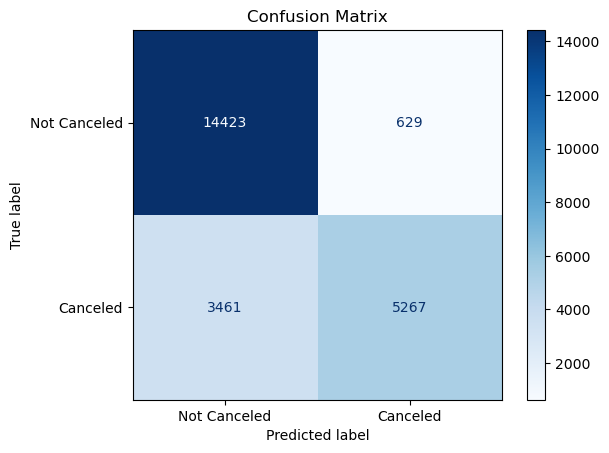

In [164]:
#Fitting best models and printing results
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = ['Not Canceled', 'Canceled']

plot_confusion_matrix(best_model, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     15052
           1       0.89      0.60      0.72      8728

    accuracy                           0.83     23780
   macro avg       0.85      0.78      0.80     23780
weighted avg       0.84      0.83      0.82     23780

